  So lets import the required libs

In [106]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.animation as animation
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


%matplotlib inline

Compute Mean squared error

In [107]:
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

Now, we'll see code to descend gradient step by step

In [108]:
def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
        #print str(b_gradient) + " " + str(m_gradient)   
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

Running the gradient 

In [113]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, np.array(points), learning_rate)
        #if i%100 == 0:
        #    print "b:"+str(b)+" m:"+str(m)+" err:"+str(compute_error_for_line_given_points(b, m, points))
    return [b, m]

In [114]:
def predict(b, m, x_list):
    predicted_y = list()
    for x in x_list:
        y = m * x + b
        predicted_y.append(y)
    return predicted_y

Initializer function

In [115]:
def run():
    data = pd.read_csv('kc_house_data.csv')
    data = data[:10000]
    points = data.as_matrix(['sqft_living', 'price'])
    #print points
    # Looking at the plot of the points, we can see a linear trend 
    f, ax = plt.subplots(figsize=(14, 8))
    ax.set_xlabel('Size of Living Area (sqft)')
    ax.set_ylabel('House Price ($)')
    plt.scatter(points[:,0], points[:,1])
    plt.show()
    learning_rate = 0.0000001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 1000
    print "Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
    print "Running..."
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print "After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points))
    
    #Plot for comparison
    f, ax = plt.subplots(figsize=(14, 8))
    ax.set_xlabel('Size of Living Area (sqft)')
    ax.set_ylabel('House Price ($)')
    plt.plot(points[:,0], predict(b, m, points[:,0]))
    plt.scatter(points[:,0], points[:,1])
    plt.show()
    

Main

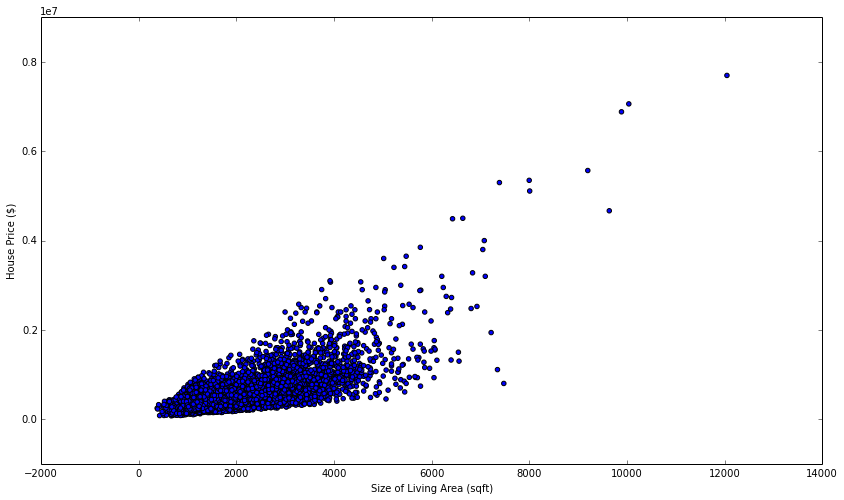

Starting gradient descent at b = 0, m = 0, error = 4.26386764826e+11
Running...
After 1000 iterations b = -1.95979918591, m = 264.801598379, error = 72619956471.1


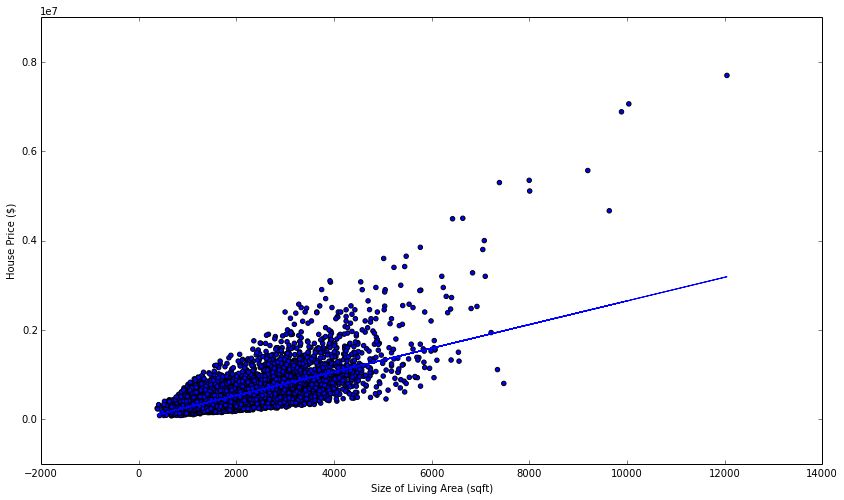

In [116]:
if __name__ == '__main__':
    np.set_printoptions(threshold=np.inf)
    
    run()